In [1]:
import seaborn as sns
import pandas as pd
import plotly as plt
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
# These functions will be reused throughts this exploration

def generate_sns_box_plot(
    df, x_column_name, y_column_name,
    title="", x_axis_label=None, y_axis_label=None,
    write_path="", filename="box_plot",
    min_y =None, max_y= None, x_dim = 45, y_dim = 7):


    max_y, min_y = _get_min_max_y(df, y_column_name, max_y, min_y)

    a4_dims = (x_dim, y_dim)
    fig, ax = plt.subplots(figsize=a4_dims)

    if y_axis_label is not None:
        plt.ylabel(y_axis_label)

    if x_axis_label is not None:
        plt.xlabel(x_axis_label)


    ax.set(ylim=(min_y, max_y))
    ax = sns.boxplot(x=x_column_name, y=y_column_name, data=df)
    ax = sns.swarmplot(x=x_column_name, y=y_column_name, data=df, color=".05",size=2 )


    return ax



def _get_min_max_y(df, y_col_name, max_y, min_y, stddev_multiplier=1 / 3):

    if (max_y == None):
        max_y = df[y_col_name].max() + df[y_col_name].std() * stddev_multiplier

    if (min_y == None):
        min_y = df[y_col_name].min() - df[y_col_name].std() * stddev_multiplier

    return max_y, min_y


def filter_dataframe_by_values_of_interest(df,x_var,var_list):
    df_list = []
    for var in var_list:
        new_df = df[df[x_var]==var]
        if(len(new_df)>0):
            df_list.append(new_df)
        else:
            print("Didn't find values matching: " + var)
    df_ret = pd.concat(df_list,ignore_index=True)
    
    return df_ret

def plot_variables_of_interest(df,x_var,y_values,var_list, x_dim = 10, y_dim = 10):
    
    df_ret = filter_dataframe_by_values_of_interest(df,x_var,var_list,)
    
    generate_sns_box_plot(df_ret,x_var, y_values, x_dim = x_dim, y_dim = y_dim)

### Business Questions

All questions asked will be asked for respondents from the United States :
1. How much does you level of education contribute to your salary?
2. How much does your undergrad major contribute to your salary?
3. How much does race and gender contribute to salary?
4. What factors in general contribute to salary the most?


4. How does pay differ by company size?
5. How does your education relate with job satisfaction / career satisfaction? 
6. What percentage of people get a doctoral degree by country. 

## Step 1: Gather Data

In [3]:
df_blog = pd.read_csv("data_input/survey_results_public.csv")

## Step 2: Assess Data

In [4]:
# As one of our critical variables is Salary, let's check for the number of nulls it has:
print("Percent of Salary Nulls: " + str(np.sum(df_blog["Salary"].isnull())/len(df_blog) * 100))
# Every response has a value for country, which means we don't have to handle nulls for this
print("Percent of Country Nulls: " + str(np.sum(df_blog["Country"].isnull())/len(df_blog) * 100))

# The following will be treated individually as we progress through our analysis 
print("Percent of Formal Education Nulls: " + str(np.sum(df_blog["FormalEducation"].isnull())/len(df_blog) * 100))
print("Percent of MajorUndergrad Nulls: " + str(np.sum(df_blog["MajorUndergrad"].isnull())/len(df_blog) * 100))
print("Percent of Gender Nulls: " + str(np.sum(df_blog["Gender"].isnull())/len(df_blog) * 100))
print("Percent of Race Nulls: " + str(np.sum(df_blog["Race"].isnull())/len(df_blog) * 100))


Percent of Salary Nulls: 74.91632938978829
Percent of Country Nulls: 0.0
Percent of Formal Education Nulls: 0.0
Percent of MajorUndergrad Nulls: 16.638776463262765
Percent of Gender Nulls: 31.804561021170606
Percent of Race Nulls: 35.72345890410959


## Step 3: Clean Data

In [5]:
# We only care about responses that have a non null salary, so let's filter for that
df_blog = df_blog[~ df_blog["Salary"].isnull()]
print("Updated Percent of Salary Nulls: " + str(np.sum(df_blog["Salary"].isnull())/len(df_blog) * 100))

Updated Percent of Salary Nulls: 0.0


## Step 4: Analyze
### Q1:  How much does you level of education contribute to your salary?

In [6]:
df_us = df_blog[df_blog["Country"] == "United States"]
# Filter out all null values for education
df_us_edu = df_us[~ df_us["Salary"].isnull()]
# Get percentages by education level
df_us_edu["FormalEducation"].value_counts() / len(df_us_edu["FormalEducation"]) * 100

Bachelor's degree                                                    60.142819
Some college/university study without earning a bachelor's degree    17.561492
Master's degree                                                      16.530019
Doctoral degree                                                       2.327427
Secondary school                                                      2.327427
Primary/elementary school                                             0.476065
Professional degree                                                   0.290928
I never completed any formal education                                0.211584
I prefer not to answer                                                0.132240
Name: FormalEducation, dtype: float64

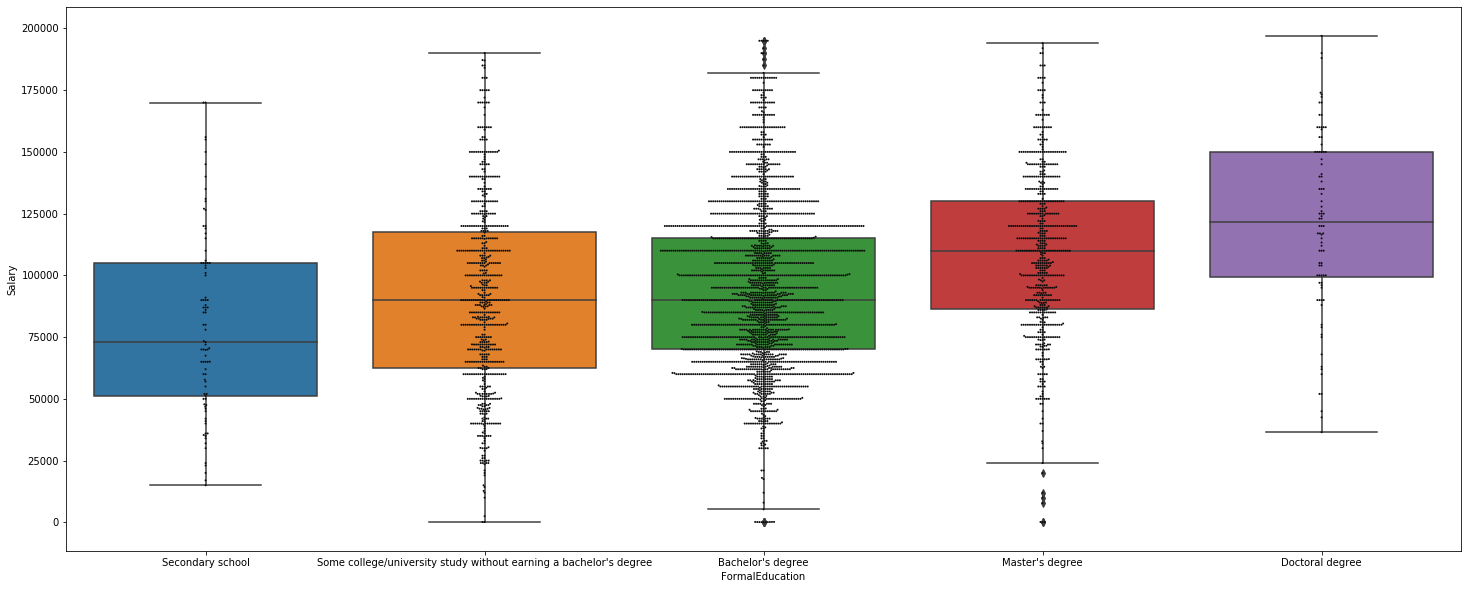

In [7]:
# We only care about the following variables
education_list= ["Secondary school","Some college/university study without earning a bachelor's degree",
                 "Bachelor's degree","Master's degree","Doctoral degree"]

# We can see a clear trend with salary and level of education
plot_variables_of_interest(df_us_edu,"FormalEducation","Salary",education_list,x_dim = 25)

### Q2: How much does your undergrad major contribute to your salary?

In [8]:
# remove null values for undergrad major
df_us_major = df_us[~ df_us["MajorUndergrad"].isnull()] 
# Get an understanding of what responders studies in undergrad
df_us_major["MajorUndergrad"].value_counts() / len(df_us_major["MajorUndergrad"]) * 100

Computer science or software engineering                        50.559956
Computer engineering or electrical/electronics engineering       8.549577
A natural science                                                4.944004
Computer programming or Web development                          4.862060
A non-computer-focused engineering discipline                    3.878722
Mathematics or statistics                                        3.769462
A humanities discipline                                          3.605572
Fine arts or performing arts                                     3.168533
Information technology, networking, or system administration     3.086588
Something else                                                   3.031958
A business discipline                                            2.895384
Management information systems                                   2.540290
A social science                                                 2.294455
I never declared a major              

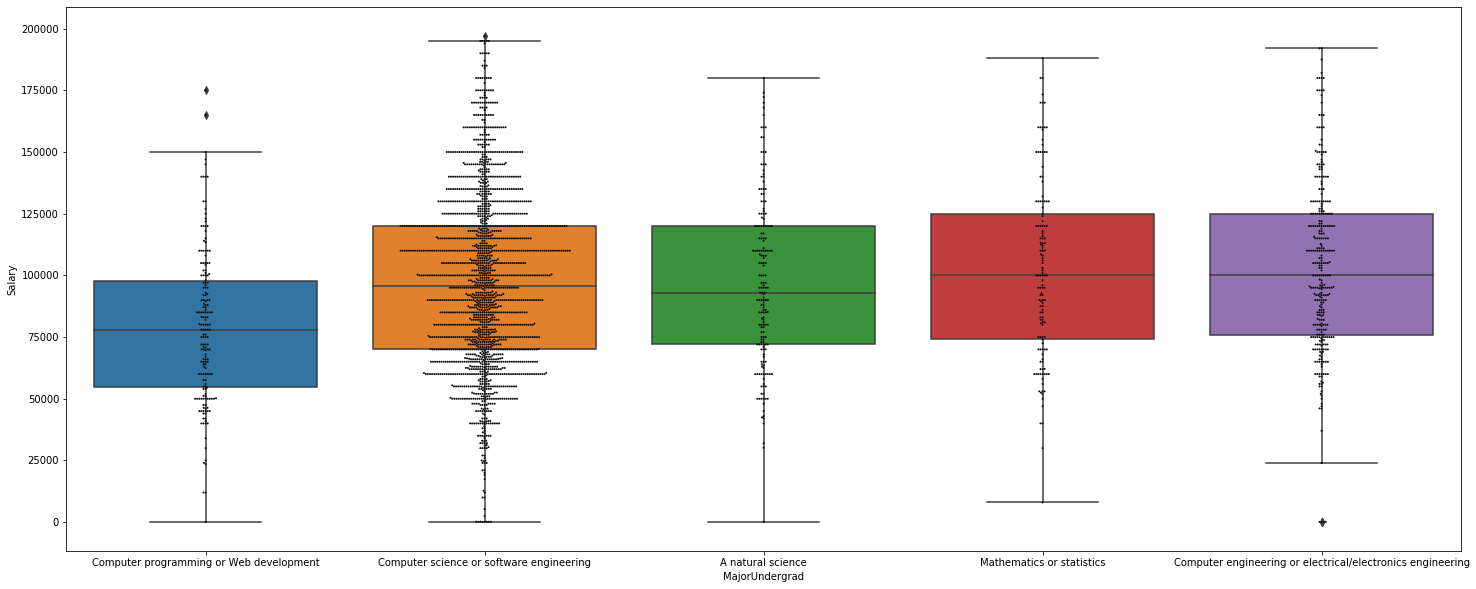

In [9]:
# This is the list we care about 
undergrad_major_list= ["Computer programming or Web development","Computer science or software engineering",
 "A natural science","Mathematics or statistics","Computer engineering or electrical/electronics engineering",]


plot_variables_of_interest(df_us_major,"MajorUndergrad","Salary",undergrad_major_list,x_dim = 25)

### Q3: How much does race and gender contribute to salary?

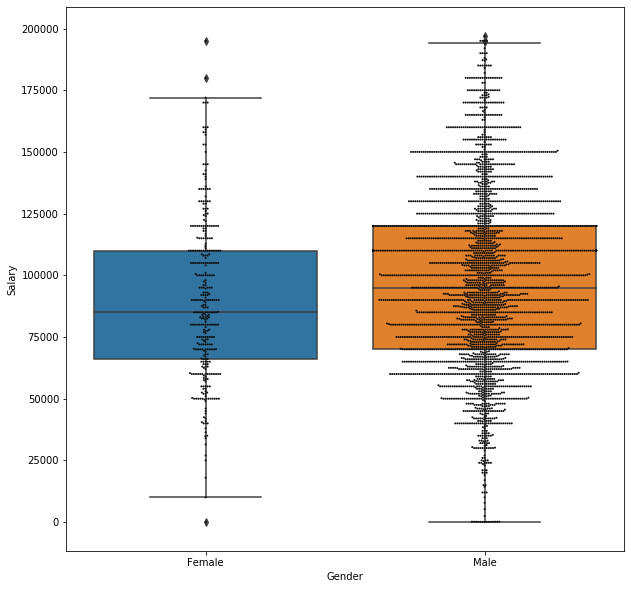

In [10]:
# remove null values for undergrad major
df_us_gender = df_us[~ df_us["Gender"].isnull()] 
gender_list= ["Female","Male",]
plot_variables_of_interest(df_us_gender,"Gender","Salary",gender_list)

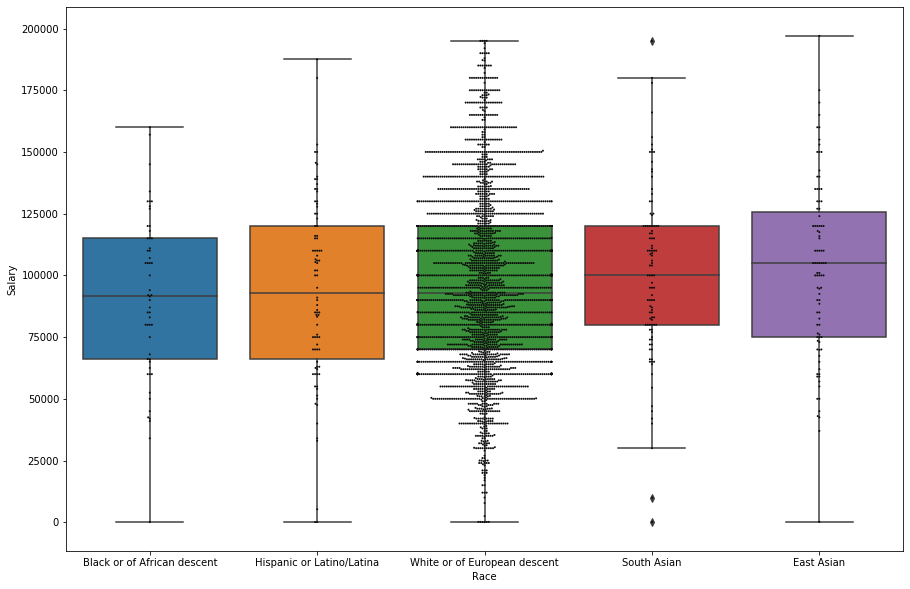

In [11]:
df_us_race = df_us[~ df_us["Race"].isnull()] 
r_list = ["Black or of African descent",'Hispanic or Latino/Latina', 
          "White or of European descent","South Asian", "East Asian"]
plot_variables_of_interest(df_us_race,"Race","Salary",r_list,x_dim=15)          

In [13]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool, whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1], what proportion of data in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 

    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model

    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test



In [49]:
#Dropping where the salary has missing values





#df_us_salary_custom = df_us[['Salary','Race','Gender']]
df_us_salary_custom = df_us[['Salary','Race','Gender','FormalEducation']]
df_us_salary_custom = df_us_salary_custom[~ df_us_salary_custom["FormalEducation"].isnull()] 

#df_us_salary_custom = df_us[['Salary','Race','Gender','FormalEducation']]
#df_us_salary_custom  = df_us_salary_custom.dropna(subset=['Salary'], axis=0)
#print(len(df_us_salary_custom))

#df_us_salary_custom = df_us_salary[['Salary','Race','Gender','MajorUndergrad','FormalEducation']]
# Only look for race values described above
df_us_salary_custom = filter_dataframe_by_values_of_interest(df_us_salary_custom,'Race',r_list)
df_us_salary_custom = filter_dataframe_by_values_of_interest(df_us_salary_custom,'Gender',gender_list)
#df_us_salary_custom = filter_dataframe_by_values_of_interest(df_us_salary_custom,'MajorUndergrad',undergrad_major_list)
#df_us_salary_custom = filter_dataframe_by_values_of_interest(df_us_salary_custom,'FormalEducation',education_list)
print(education_list)
print(str(np.sum(df_us_salary_custom.isnull())/len(df_us_salary_custom) * 100))
print(len(df_us_salary_custom))

#Pull a list of the column names of the categorical variables
cat_df = df_us_salary_custom.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
print(cat_cols_lst)

print(df_us_salary_custom['FormalEducation'].value_counts())



['Secondary school', "Some college/university study without earning a bachelor's degree", "Bachelor's degree", "Master's degree", 'Doctoral degree']
Salary             0.0
Race               0.0
Gender             0.0
FormalEducation    0.0
dtype: float64
3043
Index(['Race', 'Gender', 'FormalEducation'], dtype='object')
Bachelor's degree                                                    1855
Some college/university study without earning a bachelor's degree     515
Master's degree                                                       503
Doctoral degree                                                        71
Secondary school                                                       69
Primary/elementary school                                              13
Professional degree                                                     8
I never completed any formal education                                  7
I prefer not to answer                                                  2
Name: Formal

In [50]:
df_us_salary_custom

,Salary,Race,Gender,FormalEducation
0,52500.0,Black or of African descent,Female,Bachelor's degree
1,80000.0,Black or of African descent,Female,Bachelor's degree
2,75000.0,Black or of African descent,Female,Bachelor's degree
3,60000.0,Black or of African descent,Female,Bachelor's degree
4,160000.0,Black or of African descent,Female,Bachelor's degree
...,...,...,...,...
3038,110000.0,East Asian,Male,Bachelor's degree
3039,62000.0,East Asian,Male,Bachelor's degree
3040,95000.0,East Asian,Male,Bachelor's degree
3041,100000.0,East Asian,Male,Master's degree


In [51]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_us_salary_custom, 'Salary', cat_cols_lst, dummy_na=False)

In [52]:

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)

    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    #coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('coefs', ascending=False)
    return coefs_df



In [53]:

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)

,est_int,coefs
10,FormalEducation_I prefer not to answer,46246.430937
8,FormalEducation_Doctoral degree,27298.266209
13,FormalEducation_Professional degree,17045.535370
11,FormalEducation_Master's degree,12709.063226
6,Gender_Male,5997.761082
1,Race_East Asian,4609.434163
2,Race_Hispanic or Latino/Latina,-287.618263
4,Race_White or of European descent,-437.766374
3,Race_South Asian,-634.002198
9,FormalEducation_I never completed any formal e...,-2253.569063


In [48]:
# Percentage of country choosing to do a PHD:

for country in df_blog["Country"].unique():
    
    df_country = df_blog[df_blog["Country"]==country]
    doc_num = df_country[df_country["FormalEducation"] == "Doctoral degree"].shape[0]
    total_num = df_country.shape[0]
    print(country + ": " + str(doc_num/ total_num*100))
    



United Kingdom: 4.040404040404041
United States: 2.3274266067177996
Israel: 0.0
Croatia: 4.3478260869565215
Argentina: 0.0
Germany: 3.2193158953722336
Brazil: 0.8438818565400843
Italy: 1.9900497512437811
India: 0.24360535931790497
Netherlands: 4.62962962962963
Poland: 0.9463722397476341
Spain: 1.4388489208633095
France: 6.289308176100629
Turkey: 2.898550724637681
Mexico: 1.0416666666666665
Estonia: 0.0
Finland: 6.024096385542169
Denmark: 4.444444444444445
Lithuania: 0.0
Sweden: 3.076923076923077
Ukraine: 2.7777777777777777
Russian Federation: 1.5151515151515151
Canada: 1.4992503748125936
Uruguay: 0.0
Greece: 1.6666666666666667
Costa Rica: 0.0
Iran: 0.0
Slovenia: 0.0
El Salvador: 0.0
Portugal: 0.0
Switzerland: 4.666666666666667
Albania: 0.0
Austria: 0.0
Romania: 0.8264462809917356
Australia: 1.5625
Japan: 0.0
Belgium: 1.0526315789473684
Vietnam: 0.0
Norway: 0.0
Saudi Arabia: 0.0
Colombia: 0.0
Bulgaria: 0.0
Pakistan: 0.0
Serbia: 0.0
Czech Republic: 2.5974025974025974
Macedonia: 0.0
New Z